# Cleaning - missing and duplicate data

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate a t-shirt order
have a name, a t-shirt size, a t-shirt color and a weight(in pounds)<br>
Uses the <a href="https://pypi.org/project/names/https://pypi.org/project/names/">names </a> module to generate random names

In [278]:
import utils as ut
df = ut.generate_tshirt_order()
df

,weight,t_shirt_size,t_shirt_color,name
0,112.398216,small,orange,James Healy
1,102.932042,small,green,Graham Blair
2,101.492057,small,black,Matthew Smith
3,98.285773,small,blue,Fred Johnson
4,133.788683,small,black,Corinne Whitley
...,...,...,...,...
295,159.624440,large,red,Charlene Fuller
296,171.478344,large,orange,Bernice Jasso
297,171.162418,large,blue,Willie Geiger
298,181.382708,large,green,Judith Davidson


### Make some duplicates

In [279]:
# make some duplicates just to show how to handle duplicates (delete them)
#lets find the oldest male and female
def fun1(df,numb=5):
    #generates numb rows from df
    return (df.iloc[0:numb,:])


#generates numb rows from each group to be used as duplicates
df_dups=df.groupby('t_shirt_size').apply(fun1)
df_dups

weight t_shirt_size t_shirt_color               name
t_shirt_size                                                              
large        200  124.874042        large         green      Robert London
             201  139.325263        large          blue         Shawn Choi
             202  151.473598        large          blue   Yolande Palacios
             203  198.906641        large         black  Jacquelyn Damiano
             204  208.326315        large         green       Fred Chapman
medium       100  179.840768       medium          blue   Latonia Williams
             101  127.929431       medium          blue     Michael Warden
             102  132.948314       medium          blue       Lynn Silvers
             103  136.889420       medium           red        Susan Bates
             104  120.944790       medium           red     Phillis Runion
small        0    112.398216        small        orange        James Healy
             1    102.932042        small         green       Graham Blair
             2    101.492057        small         black      Matthew Smith
             3     98.285773        small          blue       Fred Johnson
             4    133.788683        small         black    Corinne Whitley

### Append to original dataframe

In [280]:
df=pd.concat([df,df_dups],ignore_index=True)
#the old, soon to be deprecated way
# df=df.append(df_dups, ignore_index=True)
len(df)

315

In [281]:
df.name.duplicated().sum()

16

### randomly select 20% of rows for t_shirt_size ommision

In [282]:
#first save orig size for later comparison
df['t_shirt_size_orig'] = df['t_shirt_size']

In [283]:
import random
res = random.sample(range(0, len(df)), int(0.2 * len(df)))
print(f'Number of rows to have "t_shirt_size" set to np.Nan is {len(res)}' )

Number of rows to have "t_shirt_size" set to np.Nan is 63


In [284]:
#first, save orig size
# df['t_shirt_size_orig'] = df.loc[res,'t_shirt_size']

#then lose orig size
df.loc[res,'t_shirt_size']=np.NaN

In [285]:
#how many total
#df.isna().sum().sum()

#how many are null?
df.t_shirt_size.isna().sum()

63

In [286]:
#show the missing data
df[df.t_shirt_size.isna()].head()

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
3,98.285773,NaN,blue,Fred Johnson,small
4,133.788683,NaN,black,Corinne Whitley,small
8,79.455636,NaN,green,Richard Barham,small
11,111.185269,NaN,blue,Debra Owens,small
18,92.739514,NaN,blue,Tracy Steinert,small


In [287]:
df.head()

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,112.398216,small,orange,James Healy,small
1,102.932042,small,green,Graham Blair,small
2,101.492057,small,black,Matthew Smith,small
3,98.285773,NaN,blue,Fred Johnson,small
4,133.788683,NaN,black,Corinne Whitley,small


### Lets take a look at the distribution

#### kind ='hist', hist will bin the number of weights and display them, hue will determine which color group they belong to

/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

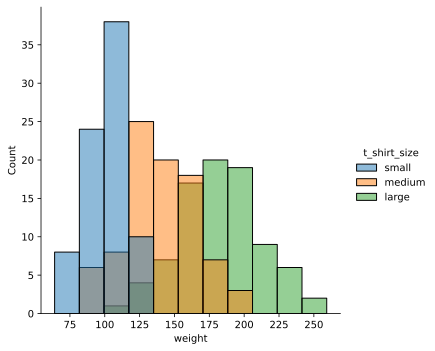

In [288]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='hist', fill=True);

#### kind ='kde', kde is a kernel density estimater, essentially calculates a gaussian distribution around each point, and then adds these distributions, and then divides by the number of points to get the smooth curves you see that have an area of 1.  I'm showing it because its easier to see the distributions

/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

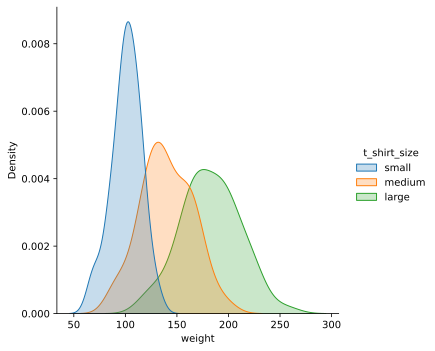

In [289]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='kde', fill=True);

df.t_shirt_size.value_counts()## What to do about duplicates?  Delete them!

### Find them first

In [290]:
df.duplicated(keep=False).sum()

22

### Visually Verify 

In [291]:
df[df.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
204,208.326315,large,green,Fred Chapman,large
304,208.326315,large,green,Fred Chapman,large
1,102.932042,small,green,Graham Blair,small
311,102.932042,small,green,Graham Blair,small
303,198.906641,large,black,Jacquelyn Damiano,large
203,198.906641,large,black,Jacquelyn Damiano,large
310,112.398216,small,orange,James Healy,small
0,112.398216,small,orange,James Healy,small
100,179.840768,medium,blue,Latonia Williams,medium
305,179.840768,medium,blue,Latonia Williams,medium


### Now drop the regular duplicates that are not missing data

In [292]:
df.duplicated?


Signature:
df.duplicated(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    keep: 'DropKeep' = 'first',
) -> 'Series'
Docstring:
Return boolean Series denoting duplicate rows.

Considering certain columns is optional.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', False}, default 'first'
    Determines which duplicates (if any) to mark.

    - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
    - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
    - False : Mark all duplicates as ``True``.

Returns
-------
Series
    Boolean series for each duplicated rows.

See Also
--------
Index.duplicated : Equivalent method on index.
Series.duplicated : Equivalent method on Series.
Series.drop_duplicates : Remove duplicate values from Series.
DataFrame.drop_duplicates : Remove duplica

In [293]:
df.drop( df[df.duplicated(keep='first')].index, inplace=True)

In [304]:
len(df)

300

## What if one of the duplicated rows is missing the t-shirt size?  Then duplicated() will not find it.  Maybe we should check for duplicates in the 'name' column instead

In [297]:
df.name.duplicated(keep=False).sum()

10

### Verify that they are duplicates first

In [298]:
df[df.name.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
4,133.788683,NaN,black,Corinne Whitley,small
314,133.788683,small,black,Corinne Whitley,small
3,98.285773,NaN,blue,Fred Johnson,small
313,98.285773,small,blue,Fred Johnson,small
112,164.232972,medium,red,Margaret Bailey,medium
249,211.558030,large,black,Margaret Bailey,large
200,124.874042,NaN,green,Robert London,large
300,124.874042,large,green,Robert London,large
201,139.325263,large,blue,Shawn Choi,large
301,139.325263,NaN,blue,Shawn Choi,large


### We want to delete the one that has a np.nan for t_shirt_size.

In [303]:
# to see the indexis that will be dropped
df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index

Index([], dtype='int64')

In [302]:
df.drop( df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index, inplace=True)

## Duplicates are gone, now how to impute the missing fields

In [305]:
len(df[(df['t_shirt_size'].isnull())])

59

In [306]:
# how many match
def printstats(df):
    numbmatches=(df['t_shirt_size_orig']==df['t_shirt_size']).sum()
    print(f'{numbmatches} tshirt sizes are correct out of {len(df)} total')

### One way is to use SimpleImputer and assign the median value to all the missing values


In [307]:
df_med=df.copy()
df_med

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,112.398216,small,orange,James Healy,small
1,102.932042,small,green,Graham Blair,small
2,101.492057,small,black,Matthew Smith,small
5,78.838900,small,red,Kimberly Rooney,small
6,71.374048,small,blue,Anton Baker,small
...,...,...,...,...,...
298,181.382708,NaN,green,Judith Davidson,large
299,194.431282,large,green,Mary Alford,large
300,124.874042,large,green,Robert London,large
313,98.285773,small,blue,Fred Johnson,small


In [309]:
# df[df.t_shirt_size.isnull()]

In [314]:
df.t_shirt_size.value_counts(dropna=False)

t_shirt_size
medium    82
large     82
small     77
NaN       59
Name: count, dtype: int64

In [312]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)  #works with strings
imp = imp.fit(df_med[['t_shirt_size']])   #here is where it determines what the most frequent is
df_med['t_shirt_size']=imp.transform(df_med[['t_shirt_size']])[:,0] #here is where the transform is applied 
# imp.transform(df_med[['t_shirt_size']])[:,0]

In [315]:
printstats(df_med)

259 tshirt sizes are correct out of 300 total


### Another way is to find the mean weight for each t-shirt size, and then assign missing value t-shirt size based on weight
For each NaN, assign t-shirt size to closest mean

#### First calculate average weight for each t-shirt size

In [316]:
df_better = df.copy()

In [317]:
avgs = df_better.groupby('t_shirt_size').weight.mean()
avgs

t_shirt_size
large     182.374776
medium    140.044639
small     100.904775
Name: weight, dtype: float64

In [318]:
#how many in each group
df_better.groupby('t_shirt_size').count()

,weight,t_shirt_color,name,t_shirt_size_orig
t_shirt_size,,,,
large,82,82,82,82
medium,82,82,82,82
small,77,77,77,77


#### Impute the value, replace any NaNs, and add a 1 in a column to indicate that this value was imputed 
<mark>The indicater column will inform a ML algorithm that this value was imputed

In [319]:
#map works on a column apply works on a row, which means we have access tothe entire row
#can also return more than 1 value so that we can have an indicator value

def func(row):
    if row.t_shirt_size is np.NaN:
        #which avgs.weight is this weight closest to?
        
        #get a list of differences between this weight and average weights
        lst_vals = [abs(row.weight-val) for val in avgs]

        #get the index of the minimum value
        min_val = min(lst_vals)
        min_index=lst_vals.index(min_val)

        #return t_shirt_size corresponding to this index
        return pd.Series([avgs.index[min_index],True],index=['t_shirt_size','t_shirt_size_indicator'])
    #its not missing, return what's there
    return pd.Series([row.t_shirt_size,False],index=['t_shirt_size','t_shirt_size_indicator'])
# df_better['t_shirt_size_indicator']=False
df_better[['t_shirt_size','t_shirt_size_indicator']]=df_better.apply(func, axis=1)

In [320]:
printstats(df_better)

289 tshirt sizes are correct out of 300 total


In [321]:
#see which ones it got wrong, look at the distributions in above plots
#it got them wrong because the weights were outliers
df_better[(df_better['t_shirt_size_indicator'])]

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig,t_shirt_size_indicator
8,79.455636,small,green,Richard Barham,small,True
11,111.185269,small,blue,Debra Owens,small,True
18,92.739514,small,blue,Tracy Steinert,small,True
24,91.913809,small,black,Joy Willardson,small,True
26,108.181375,small,green,Cheryl Terrio,small,True
29,92.092550,small,black,Jill Elliott,small,True
37,102.514571,small,green,Martha Garza,small,True
40,85.115709,small,blue,Pauline Hernandez,small,True
47,112.949452,small,red,Andrew Gray,small,True
50,107.000678,small,orange,Patricia Barkdoll,small,True


# Generate Slide for the lecture

In [ ]:
def func(df, numb=5):
    return (df.iloc[0:numb,:])
    
df.groupby('t_shirt_size', dropna=False).apply(func,numb=3)